In [1]:
import numpy as np
import tensorflow as tf
# Set the seed for NumPy
np.random.seed(42)
# Set the seed for TensorFlow
tf.random.set_seed(42)



In [2]:
import os, glob
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical



Load Data and Explore File Structure

[Kaggle DataSet ](https://www.kaggle.com/datasets/amanullahasraf/covid19-pneumonia-normal-chest-xray-pa-dataset?resource=download)

In [3]:
# Checking the contents of xrays folder
data_dir = "Data/xrays/"
data_dir


'Data/xrays/'

In [8]:
# Gettting the list of folders from data dir
subfolders = os.listdir(data_dir)
subfolders



['pneumonia', 'normal', 'covid']

In [9]:
# Getting list of img file paths (no folders)
img_files = glob.glob(data_dir+"**/*")
len(img_files)



6939

In [21]:
img_files

['Data/xrays/pneumonia/00006966_004.png',
 'Data/xrays/pneumonia/person1438_bacteria_3721.jpeg',
 'Data/xrays/pneumonia/person755_bacteria_2659.jpeg',
 'Data/xrays/pneumonia/person661_bacteria_2553.jpeg',
 'Data/xrays/pneumonia/person276_bacteria_1296.jpeg',
 'Data/xrays/pneumonia/00022965_004.png',
 'Data/xrays/pneumonia/person1353_virus_2333.jpeg',
 'Data/xrays/pneumonia/person124_virus_238.jpeg',
 'Data/xrays/pneumonia/person1619_bacteria_4261.jpeg',
 'Data/xrays/pneumonia/person1491_bacteria_3893.jpeg',
 'Data/xrays/pneumonia/person69_bacteria_338.jpeg',
 'Data/xrays/pneumonia/person321_bacteria_1489.jpeg',
 'Data/xrays/pneumonia/person688_bacteria_2584.jpeg',
 'Data/xrays/pneumonia/person1598_bacteria_4197.jpeg',
 'Data/xrays/pneumonia/person535_virus_1062.jpeg',
 'Data/xrays/pneumonia/person1222_bacteria_3177.jpeg',
 'Data/xrays/pneumonia/person581_bacteria_2392.jpeg',
 'Data/xrays/pneumonia/person1233_virus_2090.jpeg',
 'Data/xrays/pneumonia/person1253_virus_2129.jpeg',
 'Data/x

In [20]:
# Take a look at the first 5 filepaths
img_files[:-1]



['Data/xrays/pneumonia/00006966_004.png',
 'Data/xrays/pneumonia/person1438_bacteria_3721.jpeg',
 'Data/xrays/pneumonia/person755_bacteria_2659.jpeg',
 'Data/xrays/pneumonia/person661_bacteria_2553.jpeg',
 'Data/xrays/pneumonia/person276_bacteria_1296.jpeg',
 'Data/xrays/pneumonia/00022965_004.png',
 'Data/xrays/pneumonia/person1353_virus_2333.jpeg',
 'Data/xrays/pneumonia/person124_virus_238.jpeg',
 'Data/xrays/pneumonia/person1619_bacteria_4261.jpeg',
 'Data/xrays/pneumonia/person1491_bacteria_3893.jpeg',
 'Data/xrays/pneumonia/person69_bacteria_338.jpeg',
 'Data/xrays/pneumonia/person321_bacteria_1489.jpeg',
 'Data/xrays/pneumonia/person688_bacteria_2584.jpeg',
 'Data/xrays/pneumonia/person1598_bacteria_4197.jpeg',
 'Data/xrays/pneumonia/person535_virus_1062.jpeg',
 'Data/xrays/pneumonia/person1222_bacteria_3177.jpeg',
 'Data/xrays/pneumonia/person581_bacteria_2392.jpeg',
 'Data/xrays/pneumonia/person1233_virus_2090.jpeg',
 'Data/xrays/pneumonia/person1253_virus_2129.jpeg',
 'Data/x

In [13]:
# Preview an example image (at full size)
img_loaded = load_img(img_files[0])
img_data = img_to_array(img_loaded)
img_data.shape



(1024, 1024, 3)

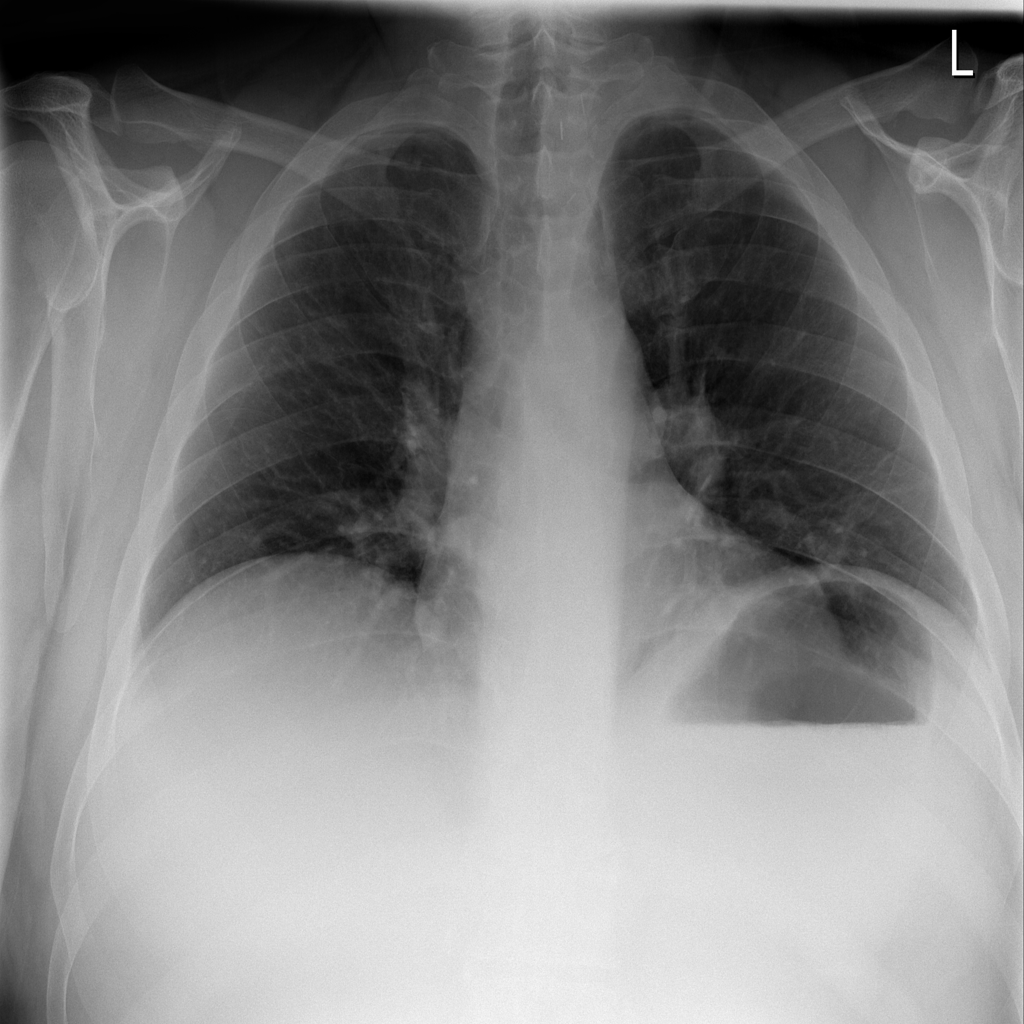

In [23]:
# Data can be converted back to image
array_to_img(img_data)



Using the image_dataset_from_directory [function](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) from tf.keras.utils to create a Dataset object.

When creating the dataset from a directory, there are several arguments that we can specify:
- directory (required): the top-level folder containing image sub-folders
- labels (defaults to "inferred"):
Either "inferred" (labels/class names will be generated from the directory structure)
None (no labels)
or a list/tuple of integer labels of the same size as the number of image files.
- label_mode (Defaults to "int"): the format/encoding that the target will be stored in.
Options include:
'int': means that the labels will be encoded as integers (e.g.[2,0,1])
'categorical': means that the labels will be encoded as a one-hot-encoded categorical vector (e.g. [ [0,0,1], [1,0,0],[0,1,0]])
'binary' means that the labels (there can be only 2) will be encoded as float32 scalars with values 0 or 1 (e.g. [0.,1.,1.,0.])
None (no labels).
- class_names: Order of the class labels (if "inferred"). If not specified, integers are assigned to labels alphabetically.

In [24]:
# Saving image params as vars for reuse
batch_size = 32
img_height = 96
img_width = 96



In [25]:
# make the dataset ds from the main folder of images
ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
    shuffle=True,
    label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
ds



Found 6902 files belonging to 3 classes.
Metal device set to: Apple M1 Pro


2023-10-25 14:13:00.964827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-25 14:13:00.965409: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<BatchDataset element_spec=(TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [26]:
# Determine number of batches in dataset
ds_size = len(ds)
ds_size



216

In [27]:
# taking a sample batch to see batch shape
example_batch_imgs,example_batch_y= ds.take(1).get_single_element()
example_batch_imgs.shape



2023-10-25 14:14:49.326386: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


TensorShape([32, 96, 96, 3])